In [2]:
import itertools
import pandas as pd
import numpy as np
import random
import csv
import time
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import keras.backend as K
from keras import Sequential
from keras.layers import Dense, Dropout

from collections import OrderedDict

In [3]:
datapath = 'C:/Users/seny/PycharmProjects/RL/thebest52-master/thebest52-master/data/books_3000_new.csv'
datapath_org = 'C:/Users/seny/PycharmProjects/RL/thebest52-master/thebest52-master/data/Books.csv'
df = pd.read_csv(datapath)
df.columns =  ['item', 'user', 'rating', 'timestamp']

In [45]:
df.head()

item  user  rating   timestamp
0    29    13     4.0  1054166400
1    29     4     4.0  1053216000
2    10    12     2.0  1410134400
3    10     6     5.0  1387670400
4    10    20     5.0  1102291200

In [46]:
df.sort_values(by='user')

item  user  rating   timestamp
69332  28646     0     5.0  1332201600
66167  19387     0     5.0  1302739200
66166  19416     0     5.0  1295568000
66164  19400     0     5.0  1306886400
11045   9497     0     3.0  1342569600
...      ...   ...     ...         ...
35819  39702    21     5.0  1361404800
90116  74633    21     3.0  1423440000
35820  39705    21     4.0  1389312000
90098  74587    21     5.0  1520985600
35506  39287    21     4.0  1361750400

[98608 rows x 4 columns]

In [47]:
user_counts = pd.DataFrame(df['user'].value_counts())
user_counts

count
user       
14     9684
13     9074
18     7077
21     5842
8      4437
15     4342
2      4159
4      4159
16     4134
17     3960
5      3923
3      3828
10     3767
1      3710
9      3583
19     3555
7      3532
20     3428
6      3172
0      3128
11     3077
12     3037

<Axes: title={'center': 'user counts'}, xlabel='user'>

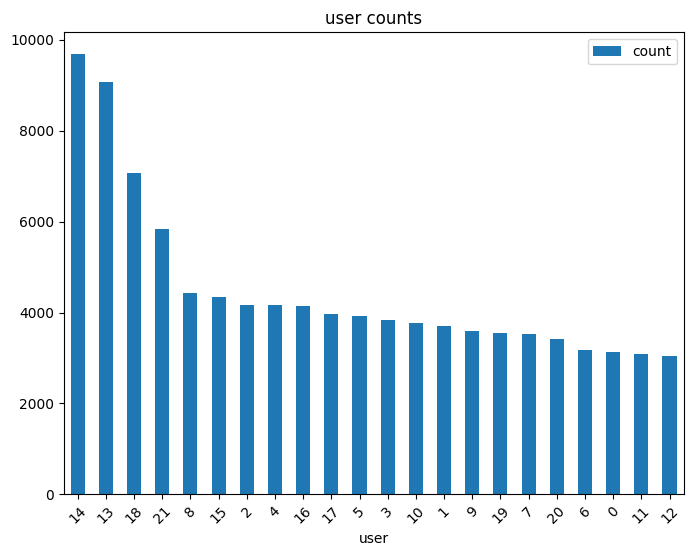

In [49]:
user_counts.plot(kind='bar',title = 'user counts',
 rot=45, fontsize=10, figsize=(8, 6))

In [50]:
user_14 = df[df['user']== 14]
user_14

item  user  rating   timestamp
15        40    14     5.0  1280188800
196       43    14     5.0  1357603200
197       43    14     5.0  1357603200
308      126    14     5.0  1357776000
309      126    14     5.0  1357776000
...      ...   ...     ...         ...
98582  83352    14     5.0  1343260800
98583  83354    14     5.0  1503360000
98584  83355    14     5.0  1485043200
98586  83356    14     5.0  1504483200
98599  83375    14     5.0  1489536000

[9684 rows x 4 columns]

In [51]:
user_14_item_count = pd.DataFrame(user_14['item'].value_counts())

In [54]:
user_14_item_count = pd.DataFrame(user_14['item'].value_counts()).reset_index()

# 'count' 컬럼명을 'count'가 아닌 다른 원하는 이름으로 변경
user_14_item_count.columns = ['item', 'count']

# 결과 확인
print(user_14_item_count)

       item  count
0     82225     19
1     22530     19
2     21791     14
3      8729     14
4     46153     13
...     ...    ...
7302  29662      1
7303  29608      1
7304  29606      1
7305  29433      1
7306  83375      1

[7307 rows x 2 columns]


item
82225    19
22530    19
21791    14
8729     14
46153    13
         ..
29662     1
29608     1
29606     1
29433     1
83375     1
Name: count, Length: 7307, dtype: int64

In [55]:
user_14_item_count

item  count
0     82225     19
1     22530     19
2     21791     14
3      8729     14
4     46153     13
...     ...    ...
7302  29662      1
7303  29608      1
7304  29606      1
7305  29433      1
7306  83375      1

[7307 rows x 2 columns]

In [56]:
user_14_item_count[user_14_item_count['item'] != 1] # 1번만 산 아이템 제외

item  count
0     82225     19
1     22530     19
2     21791     14
3      8729     14
4     46153     13
...     ...    ...
7302  29662      1
7303  29608      1
7304  29606      1
7305  29433      1
7306  83375      1

[7307 rows x 2 columns]

In [57]:
user_14_item_count[user_14_item_count['item'] >5] # 5번 이상 산 아이템

item  count
0     82225     19
1     22530     19
2     21791     14
3      8729     14
4     46153     13
...     ...    ...
7302  29662      1
7303  29608      1
7304  29606      1
7305  29433      1
7306  83375      1

[7307 rows x 2 columns]

<Axes: title={'center': "user 14's item counts"}, xlabel='item'>

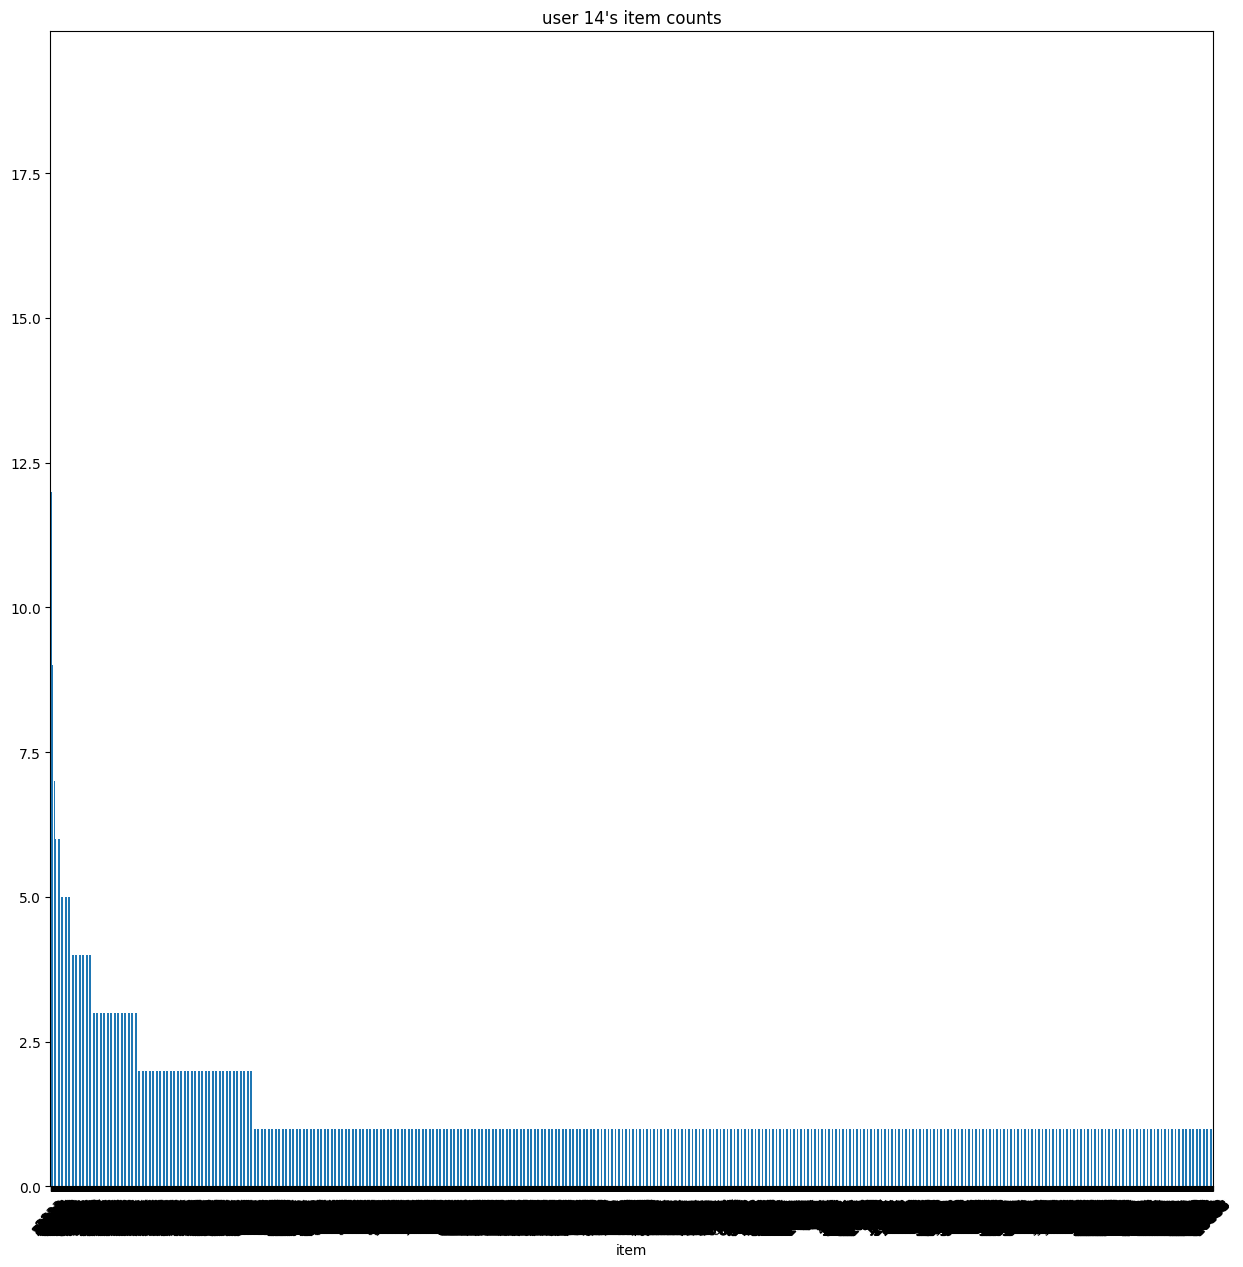

In [58]:
user_14['item'].value_counts().plot(kind='bar',title = 'user 14\'s item counts',
 rot=45, fontsize=10, figsize=(15, 15))

<Axes: title={'center': "user 14's item counts"}, ylabel='Frequency'>

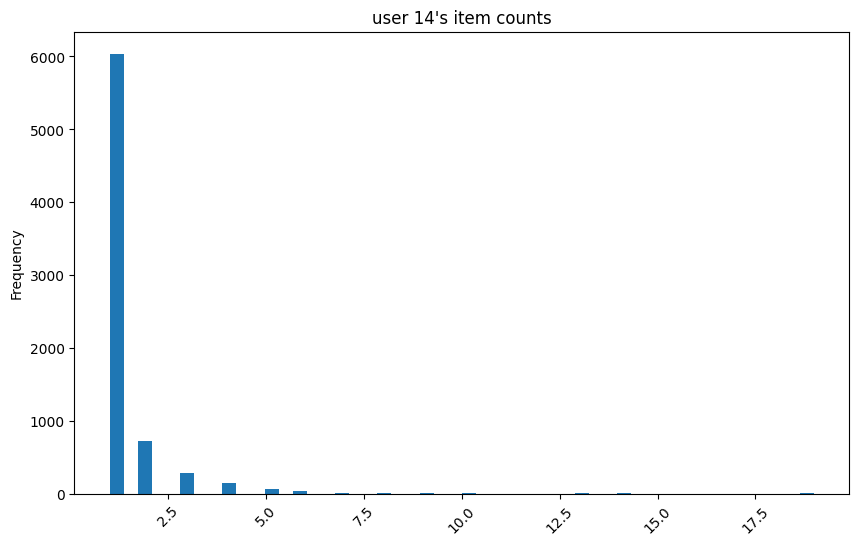

In [59]:
user_14['item'].value_counts().plot(kind='hist',title = 'user 14\'s item counts',
 rot=45, fontsize=10, figsize=(10, 6), bins=50)

<Axes: title={'center': "user 14's item counts"}, ylabel='Frequency'>

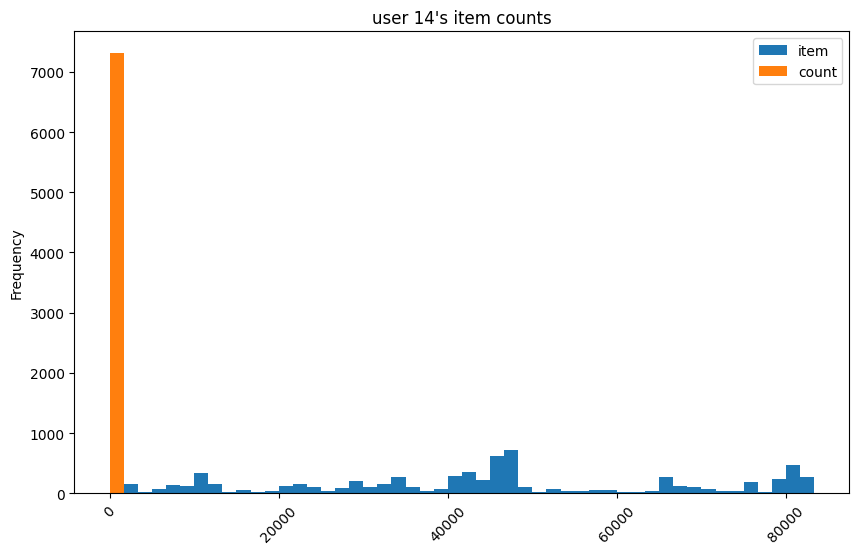

In [60]:
user_14_item_count[user_14_item_count['item'] != 1].plot(kind='hist',title = 'user 14\'s item counts',
 rot=45, fontsize=10, figsize=(10, 6), bins=50)

# json 파일 parsing - Metadata

In [4]:
import json # import json module

json_list = []
# with statement
# with open('../aiffel/RL_Recommender/meta_Books.json') as json_file:
#     metadata = json.load(json_file)

for line in open('C:/Users/seny/PycharmProjects/RL/thebest52-master/thebest52-master/data/meta_Books.json'):
    json_list.append(json.loads(line))

In [5]:
df_md = pd.DataFrame(json_list) # dataframe for metadata

In [63]:
df_md_copy = df_md.copy() # 복사본 만들기....ㅠㅠ 오류터질때마다 매번 다시 불러오기 오래걸려서..

In [64]:
df_md = df_md_copy.copy() # 저장한거 불러올때 쓰삼~

In [65]:
'New, Used & Rental Textbooks' in df_md['category'][1]

True

In [ ]:
for i in range(len(df_md['category'])):
    if 'New, Used & Rental Textbooks' in df_md['category'][i] or 'New, Used &amp; Rental Textbooks' in df_md['category'][i]:
        print(df_md['category'][i])

['Books', 'New, Used & Rental Textbooks', 'Medicine & Health Sciences']
['Books', 'New, Used & Rental Textbooks', 'Medicine & Health Sciences']
['Books', 'New, Used & Rental Textbooks', 'Business & Finance']
['Books', 'New, Used & Rental Textbooks']
['Books', 'New, Used & Rental Textbooks', 'Science & Mathematics']
['Books', 'New, Used & Rental Textbooks', 'Medicine & Health Sciences']
['Books', 'New, Used & Rental Textbooks', 'Humanities']
['Books', 'New, Used & Rental Textbooks', 'Humanities']
['Books', 'New, Used & Rental Textbooks']
['Books', 'New, Used & Rental Textbooks', 'Medicine & Health Sciences']
['Books', 'New, Used & Rental Textbooks']
['Books', 'New, Used & Rental Textbooks', 'Science & Mathematics']
['Books', 'New, Used &amp; Rental Textbooks']
['Books', 'New, Used &amp; Rental Textbooks', 'Humanities']
['Books', 'New, Used &amp; Rental Textbooks']
['Books', 'New, Used &amp; Rental Textbooks', 'Humanities']
['Books', 'New, Used &amp; Rental Textbooks']
['Books', 'New, Us

In [8]:
df_md

category tech1  \
0                                                       []         
1        [Books, New, Used & Rental Textbooks, Medicine...         
2                       [Books, Arts & Photography, Music]         
3                       [Books, Arts & Photography, Music]         
4                                                       []         
...                                                    ...   ...   
2934944  [Books, Mystery, Thriller & Suspense, Thriller...         
2934945             [Books, Literature & Fiction, Erotica]         
2934946                                                 []         
2934947  [Books, Religion & Spirituality, New Age & Spi...         
2934948                                                 []         

                                               description fit  \
0        [It is a biology book with God&apos;s perspect...       
1                                                       []       
2        [Discography of American Punk, Hardcore, and P...       
3        [This is a collection of classic gospel hymns ...       
4                                                       []       
...                                                    ...  ..   
2934944                                                 []       
2934945                                                 []       
2934946                                                 []       
2934947                                                 []       
2934948                                                 []       

                                                     title  \
0        Biology Gods Living Creation Third Edition 10 ...   
1        Mksap 16 Audio Companion: Medical Knowledge Se...   
2        Flex! Discography of North American Punk, Hard...   
3               Heavenly Highway Hymns: Shaped-Note Hymnal   
4        Georgina Goodman Nelson Womens Size 8.5 Purple...   
...                                                    ...   
2934944  Made Men: A Thriller (Law of Retaliation Book ...   
2934945  Raptor&#39;s Desire (A Planet Desire novelette...   
2934946  LG K4 Case,LG Optimus Zone 3 Case,LG Spree Cas...   
2934947                              Magickal Incantations   
2934948  White Away EURO 2016 Match Football Soccer Adu...   

                                                  also_buy tech2  \
0        [0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...         
1                                                       []         
2                                                       []         
3                                                       []         
4                                                       []         
...                                                    ...   ...   
2934944                                       [B01CRJ3J1I]         
2934945  [B01CWFQJKU, B01G7W20HA, B01CXJDC0U, B01H3XUPV...         
2934946                                                 []         
2934947  [B06XP26WK7, B0797Y6JH6, B01M72TG0D, B00JCFEMB...         
2934948                                                 []         

                                      brand feature  \
0                              Keith Graham      []   
1                                       Acp      []   
2                          Burkhard Jarisch      []   
3                             Stamps/Baxter      []   
4                                                []   
...                                     ...     ...   
2934944   Visit Amazon's Bradley Ernst Page      []   
2934945  Visit Amazon's Delilah Devlin Page      []   
2934946                                          []   
2934947                           SilvrMyst      []   
2934948                                          []   

                                     rank  \
0                    1,349,781 in Books (   
1                    1,702,625 in Books (   
2                    6,291,012 in Books (   
3                    2,384,057 in Boo

In [ ]:
for i in range(len(df_md['category'])):
    if len(df_md['category'][i]) < 1:
        pass
    else:
        df_md['category'][i] = df_md['category'][i][-1]
        if i%100000 == 0:
            print(i, ' completed')

In [6]:
def cat_preprocess(i):
    if len(i)<1:
        pass
    else:
        i = i[-1]
        print(i)
    

In [10]:
start = time.time()
# 카테고리 처리 코드
for i in range(len(df_md['category'])):
    if len(df_md['category'][i]) < 1:
        pass
    elif df_md['category'][i][-2] == 'New, Used &amp; Rental Textbooks' or df_md['category'][i][-2] == 'New, Used & Rental Textbooks' or df_md['category'][i][0] == 'New, Used &amp; Rental Textbooks' or df_md['category'][i][0] == 'New, Used & Rental Textbooks' or df_md['category'][i][-2] == 'Books':
        df_md.at[i, 'category'] = df_md['category'][i][-1]
    
    else:
        val = df_md['category'][i][-2]
        df_md.at[i, 'category'] = val
    if i%100000 == 0:
        print(i, ' completed')
        

print("time :", time.time() - start)

0  completed
100000  completed
200000  completed
300000  completed
400000  completed
500000  completed
600000  completed
700000  completed
800000  completed
900000  completed
1000000  completed
1100000  completed
1200000  completed
1300000  completed
1400000  completed
1500000  completed
1600000  completed
1700000  completed
1800000  completed
1900000  completed
2000000  completed
2100000  completed
2200000  completed
2300000  completed
2400000  completed
2500000  completed
2600000  completed
2700000  completed
2800000  completed
2900000  completed
time : 179.45517921447754


In [11]:
cat_updated_copy = df_md.copy() # 작업된거 다시 복사!

In [28]:
df_md = cat_updated_copy.copy() # 복사한거 불러오기

In [12]:
df_md # 데이터 다시확인

category tech1  \
0                                  []         
1          Medicine & Health Sciences         
2                  Arts & Photography         
3                  Arts & Photography         
4                                  []         
...                               ...   ...   
2934944  Mystery, Thriller & Suspense         
2934945          Literature & Fiction         
2934946                            []         
2934947       Religion & Spirituality         
2934948                            []         

                                               description fit  \
0        [It is a biology book with God&apos;s perspect...       
1                                                       []       
2        [Discography of American Punk, Hardcore, and P...       
3        [This is a collection of classic gospel hymns ...       
4                                                       []       
...                                                    ...  ..   
2934944                                                 []       
2934945                                                 []       
2934946                                                 []       
2934947                                                 []       
2934948                                                 []       

                                                     title  \
0        Biology Gods Living Creation Third Edition 10 ...   
1        Mksap 16 Audio Companion: Medical Knowledge Se...   
2        Flex! Discography of North American Punk, Hard...   
3               Heavenly Highway Hymns: Shaped-Note Hymnal   
4        Georgina Goodman Nelson Womens Size 8.5 Purple...   
...                                                    ...   
2934944  Made Men: A Thriller (Law of Retaliation Book ...   
2934945  Raptor&#39;s Desire (A Planet Desire novelette...   
2934946  LG K4 Case,LG Optimus Zone 3 Case,LG Spree Cas...   
2934947                              Magickal Incantations   
2934948  White Away EURO 2016 Match Football Soccer Adu...   

                                                  also_buy tech2  \
0        [0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...         
1                                                       []         
2                                                       []         
3                                                       []         
4                                                       []         
...                                                    ...   ...   
2934944                                       [B01CRJ3J1I]         
2934945  [B01CWFQJKU, B01G7W20HA, B01CXJDC0U, B01H3XUPV...         
2934946                                                 []         
2934947  [B06XP26WK7, B0797Y6JH6, B01M72TG0D, B00JCFEMB...         
2934948                                                 []         

                                      brand feature  \
0                              Keith Graham      []   
1                                       Acp      []   
2                          Burkhard Jarisch      []   
3                             Stamps/Baxter      []   
4                                                []   
...                                     ...     ...   
2934944   Visit Amazon's Bradley Ernst Page      []   
2934945  Visit Amazon's Delilah Devlin Page      []   
2934946                                          []   
2934947                           SilvrMyst      []   
2934948                                          []   

                                     rank  \
0                    1,349,781 in Books (   
1                    1,702,625 in Books (   
2                    6,291,012 in Books (   
3                    2,384,057 in Books (   
4                   11,735,726 in Books (   
...                                   ...   
2934944  1,436,585 Paid in Kindle Store (   
2934945  1,060,621 Paid in Kindle Store (   
2934946                                []  

In [13]:
df_md['category'].value_counts().head(50)

category
[]                                  389429
Literature &amp; Fiction            245054
Children's Books                    240944
History                             138048
Literature & Fiction                109725
Arts &amp; Photography              107974
Christian Books &amp; Bibles        107703
Reference                            69581
Biographies &amp; Memoirs            67130
Crafts, Hobbies &amp; Home           65446
Business &amp; Money                 64092
Romance                              58542
Humanities                           58409
Religion &amp; Spirituality          54353
Self-Help                            53504
Mystery, Thriller &amp; Suspense     53000
Arts & Photography                   49568
Politics &amp; Social Sciences       48902
Travel                               48673
Science &amp; Math                   45800
Science Fiction &amp; Fantasy        44434
Christian Books & Bibles             42340
Computers &amp; Technology           38632
Co

In [14]:
df_md['category'] = df_md['category'].str.replace(' &amp; ',' & ', regex=True)

In [15]:
df_md['category'].value_counts() # 성공!!

category
Literature & Fiction        354779
Children's Books            240944
Arts & Photography          157542
Christian Books & Bibles    150043
History                     138048
                             ...  
Germany                          1
England                          1
Czech Republic                   1
Illinois                         1
Biographies                      1
Name: count, Length: 437, dtype: int64

In [16]:
df_md['category'].value_counts().nunique() # 유니크 카테고리 수가 확실히 줄었따!

96

In [18]:
df_md.to_csv('meta_category_updated.csv')

Error: need to escape, but no escapechar set

### Category와 item id (asin)만 따오기

In [20]:
df_md = pd.read_csv('meta_category_updated.csv')

C:\Users\seny\AppData\Local\Temp\ipykernel_24956\2306993945.py:1: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_md = pd.read_csv('meta_category_updated.csv')


In [21]:
df_md

Unnamed: 0                    category tech1  \
0                0                         NaN   NaN   
1                1  Medicine & Health Sciences   NaN   
2                2          Arts & Photography   NaN   
3                3          Arts & Photography   NaN   
4                4                         NaN   NaN   
...            ...                         ...   ...   
646303      646303            Children's Books   NaN   
646304      646304        Education & Teaching   NaN   
646305      646305            Children's Books   NaN   
646306      646306                         NaN   NaN   
646307      646307     Religion & Spirituality   NaN   

                                              description  fit  \
0       ['It is a biology book with God&apos;s perspec...  NaN   
1                                                      []  NaN   
2       ['Discography of American Punk, Hardcore, and ...  NaN   
3       ['This is a collection of classic gospel hymns...  NaN   
4                                                      []  NaN   
...                                                   ...  ...   
646303                                           ['', '']  NaN   
646304                                                 []  NaN   
646305                                           ['', '']  NaN   
646306  ['Ship within 24-48 hours to all states within...  NaN   
646307  ['Jesse Bouchard is a student of Gods Word. In...  NaN   

                                                    title  \
0       Biology Gods Living Creation Third Edition 10 ...   
1       Mksap 16 Audio Companion: Medical Knowledge Se...   
2       Flex! Discography of North American Punk, Hard...   
3              Heavenly Highway Hymns: Shaped-Note Hymnal   
4       Georgina Goodman Nelson Womens Size 8.5 Purple...   
...                                                   ...   
646303  Basic Skills Summarizing, Grades 3 to 4: Focus...   
646304  Active Learning Themes from A to Z (Language A...   
646305                       Teach Them Spanish!, Grade 1   
646306  Plato Interactive Mathematics College Algebra ...   
646307      Pleasing or Deceiving: A Dangerous Compromise   

                                                 also_buy  tech2  \
0       ['0669009075', 'B000K2P5SA', 'B00MD4G2N0', 'B0...    NaN   
1                                                      []    NaN   
2                                                      []    NaN   
3                                                      []    NaN   
4                                                      []    NaN   
...                                                   ...    ...   
646303         ['0742401073', '1609964969', '0439554128']    NaN   
646304                                                 []    NaN   
646305  ['1568228414', '0742401952', '1568228422', '15...    NaN   
646306                                                 []    NaN   
646307                                                 []    NaN   

                                             brand feature  \
0                                     Keith Graham      []   
1                                              Acp      []   
2                                 Burkhard Jarisch      []   
3                                    Stamps/Baxter      []   
4                                              NaN      []   
...                                            ...     ...   
646303                                C. Karwowski      []   
646304                   Carson-Dellosa Publishing      []   
646305  Visit Amazon's Winnie Waltzer-Hackett Page      []   
646306                           D. Patrick Kinney      []   
646307                              Jesse Bouchard      []   

                         rank  \
0        1,349,781 in Books (   
1        1,702,625 in Books (   
2        6,291,012 in Books (   
3        2,384,057 in Books (   
4       11,735,726 in Books (   
...                       ...   
646303   2,972,4

In [29]:
df_md_new = df_md.loc[:, ['category', 'asin']]

In [30]:
df_md_new

category        asin
0                              NaN  0000092878
1       Medicine & Health Sciences  000047715X
2               Arts & Photography  0000004545
3               Arts & Photography  0000013765
4                              NaN  0000000116
...                            ...         ...
646303            Children's Books  0742401065
646304        Education & Teaching  0742402452
646305            Children's Books  0742401960
646306                         NaN  0741911507
646307     Religion & Spirituality  074149616X

[646308 rows x 2 columns]

In [35]:
df_md_new.rename(columns = {'asin':'item'}, inplace = True)

In [36]:
df_md_new

category        item
0                              NaN  0000092878
1       Medicine & Health Sciences  000047715X
2               Arts & Photography  0000004545
3               Arts & Photography  0000013765
4                              NaN  0000000116
...                            ...         ...
646303            Children's Books  0742401065
646304        Education & Teaching  0742402452
646305            Children's Books  0742401960
646306                         NaN  0741911507
646307     Religion & Spirituality  074149616X

[646308 rows x 2 columns]

In [37]:
df_md_new.duplicated().value_counts()

False    646308
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 100)
ids = df_md_new["item"]
df_md_new[ids.isin(ids[ids.duplicated()])].sort_values("item").head(100)

In [ ]:
df_md_new['item'].nunique()

In [ ]:
df_md_new['category'].nunique()

In [ ]:
df_md_new.to_csv('meta_category+item.csv', index=False)

In [ ]:
df_md_new = pd.read_csv('meta_category+item.csv')

### title 붙히기

In [ ]:
df_md_CaItTi = df_md.loc[:, ['category', 'title', 'asin']]

In [ ]:
df_md_CaItTi.rename(columns = {'asin':'item'}, inplace = True)

In [ ]:
df_md_CaItTi

In [ ]:
df_md_CaItTi['title'][2934946] # 메타 데이터에 책이 아닌것도 있다.

In [ ]:
df_md_CaItTi.duplicated().value_counts()

In [ ]:
ids = df_md_CaItTi["item"]
df_md_CaItTi[ids.isin(ids[ids.duplicated()])].sort_values("item")

In [ ]:
df_md_CaItTi.drop_duplicates(inplace = True)
df_md_CaItTi

In [ ]:
ids = df_md_CaItTi["item"]
df_md_CaItTi[ids.isin(ids[ids.duplicated()])].sort_values("item")

In [ ]:
df_md_CaItTi.duplicated().value_counts()

In [ ]:
df_md_CaItTi.to_csv('meta_category+item+title.csv', index=False)

In [ ]:
df_md_CaItTi = pd.read_csv('meta_category+item+title.csv')

### 유니크 카테고리 보기

In [ ]:
df_md_CaItTi['category'].nunique() # 1252개

# 합치기

## 제일 많은 유저 기준

In [ ]:
df_orig = pd.read_csv('C:/Users/seny/PycharmProjects/RL/thebest52-master/thebest52-master/data/Books.csv', names=['item','user','rating','timestamp'])

In [ ]:
df_orig

In [ ]:
user_counts = pd.DataFrame(df_orig['user'].value_counts())
user_counts = user_counts[user_counts['user'] >9000]

In [ ]:
user_counts

In [ ]:
mx_rt_user = df_orig[df_orig['user'] == 'A2OJW07GQRNJUT'] # 제일 rating을 많이 한 유저

In [ ]:
mx_rt_user

In [ ]:
mxusr_merged = pd.merge(mx_rt_user,df_md_CaItTi, how='left')
mxusr_merged

In [ ]:
df_merge_outer = pd.merge(df_orig,df_md_CaItTi, how='outer',on='item')
df_merge_outer

In [ ]:
print(51311621 - 51311770, '만큼 차이난다!')

In [ ]:
df_merge_outer.isna().sum() # 걔들은 여기서 나온거

In [ ]:
df_merge_outer[df_merge_outer['user'].isnull()] # 149개의 user 컬럼 NaN 데이터

In [ ]:
df_merge_outer.dropna(subset=['user'], inplace = True) # 데이터 수가 정확히 일치
df_merge_outer

In [ ]:
print(51311621 - 51311621, '만큼 차이난다!')

In [ ]:
df_merge_outer.to_csv('book+category+title.csv', index=False)

In [ ]:
print(df_merge_outer)

In [69]:
df_merge_outer.to_csv('book+category+title.csv', index=False)

In [70]:
print(df_merge_outer)

                item            user  rating     timestamp          category  \
0         0001713353  A1C6M8LCIX4M6M     5.0  1.123805e+09  Children's Books   
1         0001713353  A1REUF3A1YCPHM     5.0  1.112141e+09  Children's Books   
2         0001713353   A1YRBRK2XM5D5     5.0  1.081037e+09  Children's Books   
3         0001713353  A1V8ZR5P78P4ZU     5.0  1.077322e+09  Children's Books   
4         0001713353  A2ZB06582NXCIV     5.0  1.475453e+09  Children's Books   
...              ...             ...     ...           ...               ...   
51311616  B01HJDS76Y  A3P8PUZFHWFK1E     4.0  1.467245e+09               NaN   
51311617  B01HJDS76Y  A26Q9T9G9MTX9S     1.0  1.467158e+09               NaN   
51311618  B01HJEB422   AB9M1MQPBAS2J     5.0  1.487030e+09               NaN   
51311619  B01HJEB422  A2TO93KMH3DJIK     5.0  1.485648e+09               NaN   
51311620  B01HJFHYMA   A7J9KA8SAL0MA     5.0  1.473120e+09               NaN   

                                       

# Plot

### 제일 rating을 많이 한 유저(A2OJW07GQRNJUT)의 시간별 카테고리 변화

In [115]:
mxusr_count = pd.DataFrame(mxusr_merged['timestamp'].value_counts())
mxusr_count = mxusr_count[mxusr_count['timestamp']>27] # 그냥 n개 기준으로 했다.
mxusr_count.reset_index(inplace = True)
mxusr_count

index  timestamp
0  1374710400         48
1  1374796800         37
2  1378425600         37
3  1382486400         35
4  1374537600         33
5  1376438400         33
6  1389052800         31
7  1369872000         28

In [116]:
mxusr_cat_count_time = mxusr_merged[mxusr_merged['timestamp'] == mxusr_count.iloc[0][0]]
b = mxusr_cat_count_time.groupby('timestamp').apply(lambda x: x['category'].value_counts(normalize = True))

for i in range(1, len(mxusr_count)):
    mxusr_cat_count_time = mxusr_merged[mxusr_merged['timestamp'] == mxusr_count.iloc[i][0]]
    b = b.append(mxusr_cat_count_time.groupby('timestamp').apply(lambda x: x['category'].value_counts(normalize = True)))

    b = b.sort_index(axis = 0)
b

Biographies & Memoirs  Christian Books & Bibles  \
timestamp                                                     
1369872000                    NaN                       NaN   
1374537600               0.030303                  0.484848   
1374710400                    NaN                  0.708333   
1374796800                    NaN                  0.645161   
1376438400                    NaN                       NaN   
1378425600                    NaN                  0.250000   
1382486400               0.057143                  0.228571   
1389052800               0.050000                  0.200000   

            Health, Fitness & Dieting   History  Humanities  \
timestamp                                                     
1369872000                   0.291667       NaN         NaN   
1374537600                        NaN  0.333333         NaN   
1374710400                        NaN  0.125000         NaN   
1374796800                        NaN  0.129032         NaN   
1376438400                   0.156250       NaN         NaN   
1378425600                        NaN  0.375000         NaN   
1382486400                   0.171429       NaN         NaN   
1389052800                        NaN  0.150000        0.05   

            Literature & Fiction  Medical Books  New, Used & Rental Textbooks  \
timestamp                                                                       
1369872000                   NaN            NaN                           NaN   
1374537600              0.030303            NaN                           NaN   
1374710400                   NaN            NaN                           NaN   
1374796800                   NaN            NaN                           NaN   
1376438400                   NaN       0.218750                           NaN   
1378425600                   NaN            NaN                           NaN   
1382486400              0.028571       0.057143                      0.085714   
1389052800              0.400000            NaN                           NaN   

            Politics & Social Sciences  Reference  Religion & Spirituality  \
timestamp                                                                    
1369872000                         NaN        NaN                      NaN   
1374537600                         NaN        NaN                 0.121212   
1374710400                         NaN        NaN                 0.166667   
1374796800                         NaN        NaN                 0.225806   
1376438400                    0.062500        NaN                 0.437500   
1378425600                    0.031250        NaN                 0.031250   
1382486400                    0.085714        NaN                      NaN   
1389052800                         NaN       0.15                      NaN   

            Science & Math  Self-Help  Social Sciences  
timestamp                                               
1369872000             NaN   0.541667         0.166667  
1374537600             NaN        NaN              NaN  
1374710400             NaN        NaN              NaN  
1374796800             NaN        NaN              NaN  
1376438400           0.125        NaN              NaN  
1378425600             NaN   0.312500              NaN  
1382486400             NaN   0.285714              NaN  
1389052800             NaN        NaN              NaN

In [117]:
for i, j in enumerate(mxusr_count['index']):
    mxusr_count['index'][i] = datetime.fromtimestamp(j)
mxusr_count.sort_values(by=['index'], axis=0, inplace = True, ascending=True)
mxusr_count

<ipython-input-117-af8b3a540d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mxusr_count['index'][i] = datetime.fromtimestamp(j)


index  timestamp
7  2013-05-30 09:00:00         28
4  2013-07-23 09:00:00         33
0  2013-07-25 09:00:00         48
1  2013-07-26 09:00:00         37
5  2013-08-14 09:00:00         33
2  2013-09-06 09:00:00         37
3  2013-10-23 09:00:00         35
6  2014-01-07 09:00:00         31

In [118]:
b.set_index(mxusr_count['index'], inplace = True)
b

Biographies & Memoirs  Christian Books & Bibles  \
index                                                                  
2013-05-30 09:00:00                    NaN                       NaN   
2013-07-23 09:00:00               0.030303                  0.484848   
2013-07-25 09:00:00                    NaN                  0.708333   
2013-07-26 09:00:00                    NaN                  0.645161   
2013-08-14 09:00:00                    NaN                       NaN   
2013-09-06 09:00:00                    NaN                  0.250000   
2013-10-23 09:00:00               0.057143                  0.228571   
2014-01-07 09:00:00               0.050000                  0.200000   

                     Health, Fitness & Dieting   History  Humanities  \
index                                                                  
2013-05-30 09:00:00                   0.291667       NaN         NaN   
2013-07-23 09:00:00                        NaN  0.333333         NaN   
2013-07-25 09:00:00                        NaN  0.125000         NaN   
2013-07-26 09:00:00                        NaN  0.129032         NaN   
2013-08-14 09:00:00                   0.156250       NaN         NaN   
2013-09-06 09:00:00                        NaN  0.375000         NaN   
2013-10-23 09:00:00                   0.171429       NaN         NaN   
2014-01-07 09:00:00                        NaN  0.150000        0.05   

                     Literature & Fiction  Medical Books  \
index                                                      
2013-05-30 09:00:00                   NaN            NaN   
2013-07-23 09:00:00              0.030303            NaN   
2013-07-25 09:00:00                   NaN            NaN   
2013-07-26 09:00:00                   NaN            NaN   
2013-08-14 09:00:00                   NaN       0.218750   
2013-09-06 09:00:00                   NaN            NaN   
2013-10-23 09:00:00              0.028571       0.057143   
2014-01-07 09:00:00              0.400000            NaN   

                     New, Used & Rental Textbooks  Politics & Social Sciences  \
index                                                                           
2013-05-30 09:00:00                           NaN                         NaN   
2013-07-23 09:00:00                           NaN                         NaN   
2013-07-25 09:00:00                           NaN                         NaN   
2013-07-26 09:00:00                           NaN                         NaN   
2013-08-14 09:00:00                           NaN                    0.062500   
2013-09-06 09:00:00                           NaN                    0.031250   
2013-10-23 09:00:00                      0.085714                    0.085714   
2014-01-07 09:00:00                           NaN                         NaN   

                     Reference  Religion & Spirituality  Science & Math  \
index                                                                     
2013-05-30 09:00:00        NaN                      NaN             NaN   
2013-07-23 09:00:00        NaN                 0.121212             NaN   
2013-07-25 09:00:00        NaN                 0.166667             NaN   
2013-07-26 09:00:00        NaN                 0.225806             NaN   
2013-08-14 09:00:00        NaN                 0.437500           0.125   
2013-09-06 09:00:00        NaN                 0.031250             NaN   
2013-10-23 09:00:00        NaN                      NaN             NaN   
2014-01-07 09:00:00       0.15                      NaN             NaN   

                     Self-Help  Social Sciences  
index                                            
2013-05-30 09:00:00   0.541667         0.166667  
2013-07-23 09:00:00        NaN              NaN  
2013-07-25 09:00:00        NaN              NaN  
2013-07-26 09:00:00        NaN              NaN  
2013-08-14 09:00:00        NaN              NaN  
2013-09-06 09:00:00   0.312500              NaN  
2013-10-23 09:00

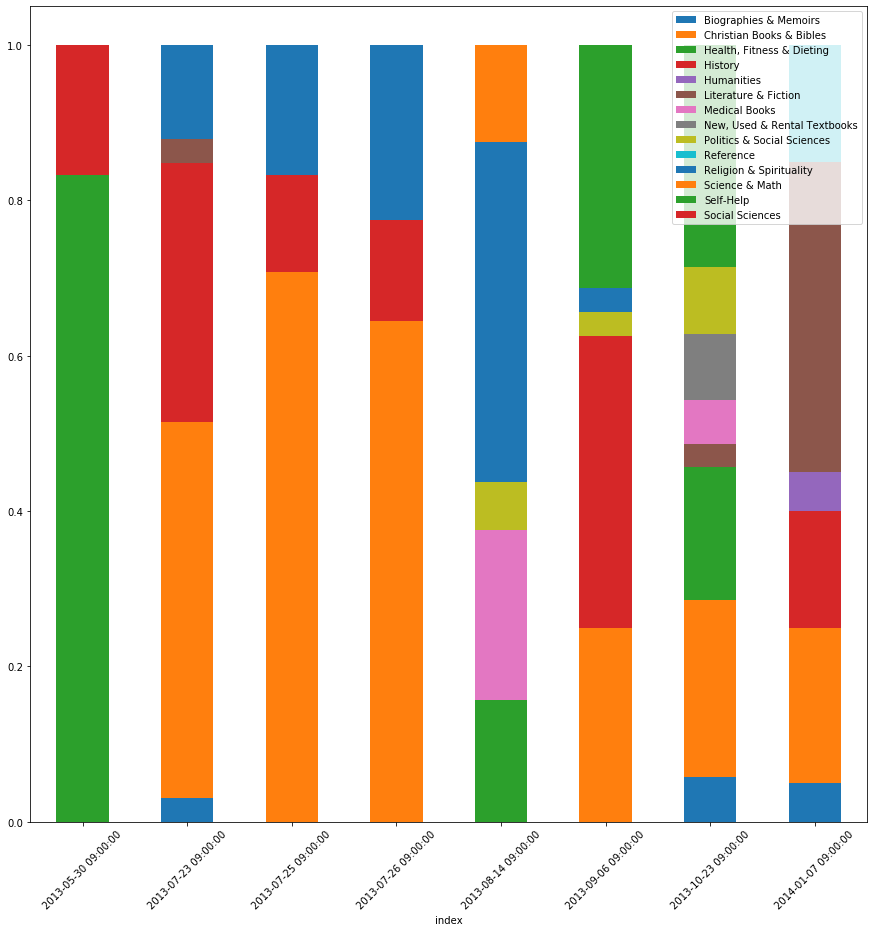

In [120]:
b.plot.bar(figsize = (15,15), width = 0.5, rot = 45, stacked=True, tick_label = True)

In [ ]:
mxusr_count.plot.bar(figsize = (10,20), 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 

In [ ]:
# category가 비어있는 데이터는 어떡하징?